# NAMA : SISILIA NABILLA MAHARANI 
# NIM : F1D020096
# KELOMPOK : 2

### Import Library

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

- import matplotlib.pyplot as plt: Ini mengimpor modul pyplot dari pustaka Matplotlib yang digunakan untuk membuat grafik dan visualisasi data. Dengan menggunakan plt sebagai alias, memudahkan kita untuk memanggil fungsi-fungsi dari modul ini dengan menggunakan plt sebagai awalan.

- import numpy as np: Ini mengimpor modul numpy yang sering digunakan untuk melakukan operasi matematika dan manipulasi array. Dengan menggunakan np sebagai alias, memudahkan kita untuk memanggil fungsi-fungsi dari modul ini dengan menggunakan np sebagai awalan.

- import cv2 as cv: Ini mengimpor modul cv2 dari pustaka OpenCV yang sering digunakan untuk pemrosesan gambar dan visi komputer. Dengan menggunakan cv sebagai alias, memudahkan kita untuk memanggil fungsi-fungsi dari modul ini dengan menggunakan cv sebagai awalan.

- import pandas as pd: Ini mengimpor modul pandas yang digunakan untuk manipulasi dan analisis data. Dengan menggunakan pd sebagai alias, memudahkan kita untuk memanggil fungsi-fungsi dari modul ini dengan menggunakan pd sebagai awalan.

### Membaca Dan Menampilkan Gambar

Kode tersebut mengimpor gambar "aang.jpg" menggunakan fungsi imread dari modul matplotlib.pyplot dan menampilkannya menggunakan imshow. Parameter cmap="gray" digunakan untuk menunjukkan bahwa gambar tersebut akan ditampilkan dalam skala abu-abu

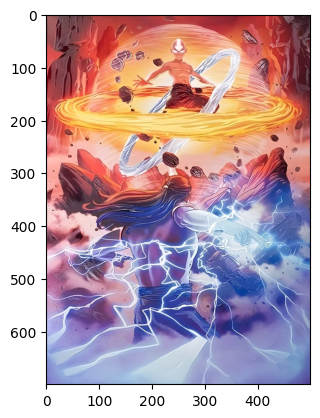

In [130]:
image = plt.imread ("aang.jpg")
plt.imshow(image, cmap="gray")

### Menampilkan Citra Hasil Gray Scale 


Kode tersebut mengkonversi gambar berwarna menjadi gambar skala abu-abu menggunakan fungsi cvtColor dari modul OpenCV. Parameter cv.COLOR_BGR2GRAY menunjukkan bahwa gambar akan dikonversi dari format warna BGR (Blue-Green-Red) menjadi skala abu-abu. Setelah konversi, gambar skala abu-abu ditampilkan menggunakan imshow dengan parameter cmap="gray" untuk memastikan bahwa gambar ditampilkan dengan skala abu-abu.

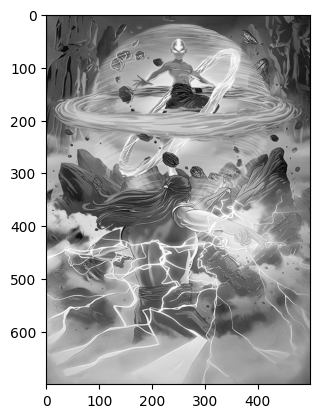

In [69]:
gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")

### Mendefinisikan Kernel

In [131]:
# Definisi Kernel
kernel = np.array([[1, 2, -1, 1],
                   [0, 2, 1, 2],
                   [2, 1, 1, 0],
                   [1, 0, -1, 0]])

# Normalisasi kernel
kernel_sum = np.sum(kernel)
if kernel_sum != 0:
    kernel = kernel // kernel_sum

print(kernel)

[[ 0  0 -1  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0 -1  0]]


Kode di atas mendefinisikan sebuah kernel dengan matriks 4x4, kemudian melakukan normalisasi pada kernel tersebut dengan membagi setiap elemennya dengan jumlah total elemen dalam kernel. Jika jumlah total elemen dalam kernel tidak sama dengan nol, maka setiap elemen dalam kernel dibagi dengan jumlah tersebut. Hasilnya kemudian dicetak.

### Konvolusi Dengan Zero Padding

In [116]:
# Zero padding
def zero_pad(gray_image, pad_size):
    return np.pad(gray_image, pad_size, mode='constant', constant_values=0)

Fungsi zero_pad di atas menerapkan zero padding pada gambar skala abu-abu. Zero padding adalah teknik yang digunakan untuk menambahkan baris dan kolom piksel dengan nilai nol di sekeliling gambar untuk memperluas ukuran gambar. script gray_image adalah gambar skala abu-abu yang akan di-padding, sedangkan pad_size adalah jumlah baris dan kolom piksel yang akan ditambahkan di sekeliling gambar. Fungsi np.pad dari NumPy digunakan untuk melakukan zero padding dengan mode 'constant', yang berarti nilai piksel yang ditambahkan adalah konstan (dalam hal ini, nol).Hasilnya adalah gambar yang telah dipad dengan nol di sekelilingnya.

#### Operasi Konvolusi

In [117]:
# Operasi konvolusi
def convolution(gray_image, kernel):
    height, width = gray_image.shape
    k_height, k_width = kernel.shape
    pad_size = k_height // 2
    padded_image = zero_pad(gray_image, pad_size)
    output = np.zeros_like(gray_image)
    for i in range(height):
        for j in range(width):
            output[i, j] = np.abs(np.sum(padded_image[i:i+k_height, j:j+k_width] * kernel))
    return output

# Lakukan konvolusi
convolved_image = convolution(gray_image, kernel)

Fungsi convolution di atas mengimplementasikan operasi konvolusi pada gambar skala abu-abu menggunakan kernel yang diberikan.
- Mengambil dimensi gambar asli (height dan width)
- Mengambil dimensi kernel (k_height dan k_width).
- Menentukan ukuran padding yang diperlukan berdasarkan tinggi kernel (pad_size).
- Melakukan zero padding pada gambar menggunakan fungsi zero_pad.
- Membuat matriks kosong dengan ukuran yang sama dengan gambar asli untuk menyimpan hasil konvolusi (output).
- Melakukan iterasi melalui setiap piksel dalam gambar asli.
- Pada setiap iterasi, dilakukan operasi konvolusi antara bagian gambar yang bersesuaian dengan ukuran kernel dan kernel itu sendiri. Hasilnya diambil nilai absolutnya dan disimpan di dalam matriks output.
- Mengembalikan gambar yang telah dikonvolusi.
  
Setelah fungsi konvolusi diterapkan, gambar hasil konvolusi disimpan dalam variabel convolved_image.

### Normalisasi Citra

In [141]:
# Normalisasi hasil konvolusi
def normalize_image(gray_image):
    min_val = np.min(gray_image)
    max_val = np.max(gray_image)
    return (gray_image - min_val) / (max_val - min_val)

normalized_image = normalize_image(convolved_image)


Fungsi normalize_image tersebut menerima gambar skala abu-abu dan mengembalikan gambar yang dinormalisasi ke dalam rentang nilai antara 0 dan 1. Ini dilakukan dengan cara berikut:

- Menghitung nilai minimum (min_val) dan nilai maksimum (max_val) dari gambar skala abu-abu.
- Mengurangi setiap piksel dalam gambar dengan nilai minimum.
- Membagi setiap piksel dengan selisih antara nilai maksimum dan nilai minimum.
Hasilnya adalah gambar yang dinormalisasi ke dalam rentang nilai antara 0 dan 1.

Setelah fungsi normalisasi diterapkan, gambar hasil normalisasi disimpan dalam variabel normalized_image.

code dibawah Ini akan menampilkan gambar hasil normalisasi menggunakan imshow dari Matplotlib, dengan parameter cmap="gray" untuk memastikan bahwa gambar ditampilkan dengan skala abu-abu.

#### Menampilkan Hasil Normalisasi

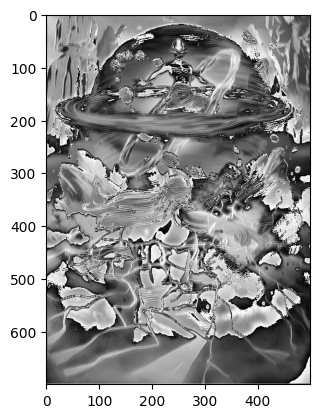

In [172]:
# Tampilkan hasil Normalisasi 
plt.imshow(normalized_image, cmap="gray")

### Histogram Citra

#### Menghitung Nilai Intensitas 

In [173]:
sumGray = np.zeros(256).astype(int)
for i in range(height) :
    for j in range(width) :
        value = gray_image[i,j]
        sumGray[value] += 1


Kode di atas menghitung jumlah kemunculan setiap nilai intensitas dalam gambar skala abu-abu.dengan cara : 
- Membuat array kosong sumGray dengan panjang 256 (karena rentang nilai intensitas dalam gambar skala abu-abu adalah 0-255).
- Melakukan iterasi melalui setiap piksel dalam gambar.
- Pada setiap iterasi, mengambil nilai intensitas piksel (dalam rentang 0-255).
- Menambahkan 1 ke elemen array sumGray yang sesuai dengan nilai intensitas tersebut.
  
Setelah iterasi selesai, array sumGray akan berisi jumlah kemunculan setiap nilai intensitas dalam gambar.

#### Tampilan Distribusi Intensitas 

In [176]:
sumGray

array([   0,    0,    0,   11,   22,   29,   59,   76,   59,   73,   68,
         73,   92,   77,  110,  103,  159,  127,  130,  162,  171,  163,
        157,  147,  146,  150,  143,  168,  191,  249,  348,  362,  401,
        412,  360,  375,  389,  400,  396,  406,  484,  430,  482,  473,
        538,  502,  589,  584,  614,  592,  620,  635,  636,  662,  680,
        819,  772,  900,  916,  943, 1066, 1100, 1142, 1183, 1273, 1282,
       1207, 1189, 1140, 1242, 1491, 1756, 1787, 1930, 1881, 1894, 2034,
       2083, 2180, 2174, 2128, 2059, 1966, 1942, 1893, 1810, 1774, 1773,
       1848, 1891, 1830, 1764, 1744, 1743, 1749, 1717, 1833, 1938, 1744,
       1732, 1788, 1829, 1869, 1859, 1664, 1715, 1787, 1727, 1754, 1767,
       1881, 1813, 1900, 1811, 1843, 1811, 1810, 1784, 1757, 1845, 1758,
       1681, 1712, 1752, 1724, 1717, 1734, 1723, 1647, 1630, 1781, 1646,
       1679, 1757, 1793, 1724, 1791, 1876, 1971, 1948, 2109, 2034, 2081,
       2079, 2157, 2129, 2182, 2059, 2143, 2203, 22


Array sumGray berisi jumlah kemunculan setiap nilai intensitas dalam gambar skala abu-abu. dapat dicetak untuk melihat distribusi intensitas piksel dalam gambar.

#### Membuat Daftar Gray Value

In [167]:
gray_value = [i for i in range(256)]

Kode di atas membuat daftar gray_value yang berisi nilai intensitas yang mungkin dalam gambar skala abu-abu, yaitu nilai antara 0 hingga 255.

Kode tersebut menggunakan plt.bar dari Matplotlib untuk membuat histogram yang menampilkan distribusi relatif dari nilai intensitas dalam gambar skala abu-abu. Setiap bar pada histogram mewakili jumlah relatif kemunculan setiap nilai intensitas dalam gambar.

script  gray_value adalah nilai-nilai intensitas yang mungkin dalam rentang 0 hingga 255.

script sumGray/(height*width) adalah nilai relatif dari setiap nilai intensitas. Ini dihitung dengan membagi jumlah kemunculan setiap nilai intensitas oleh jumlah total piksel dalam gambar (height*width), sehingga memberikan distribusi relatif dari intensitas piksel dalam gambar.

#### Tampilan Histogram

<BarContainer object of 256 artists>

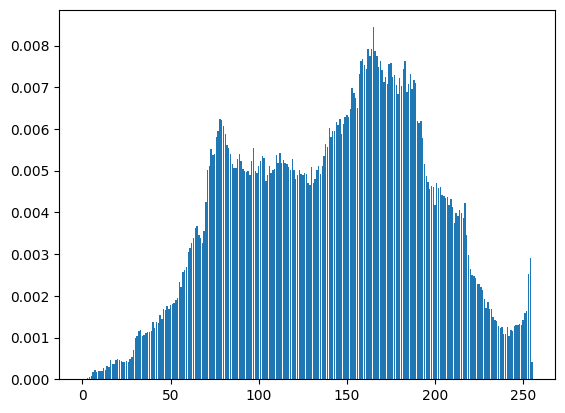

In [171]:
plt.bar(gray_value, sumGray/(height*width))

### Melakukan Rotasi = 40 searah jarum jam

In [144]:
# Definisikan matriks rotasi
angle = 40  # Sudut rotasi
rows, cols = gray_image.shape
rotation_matrix = cv.getRotationMatrix2D((cols/2, rows/2), -angle, 1)  # Negatif sudut untuk rotasi searah jarum jam

# Lakukan rotasi
rotated_image = cv.warpAffine(gray_image, rotation_matrix, (cols, rows))

Kode di atas melakukan rotasi pada gambar skala abu-abu dengan menggunakan matriks rotasi. Langkah-langkahnya adalah sebagai berikut:
- Menginisialisasi sudut rotasi (angle) sebesar 40 derajat.
- Mendapatkan dimensi gambar asli (rows dan cols).
- Menggunakan fungsi cv.getRotationMatrix2D dari OpenCV untuk mendapatkan matriks rotasi. Parameter pertama adalah titik tengah rotasi (di sini diatur ke titik tengah gambar), parameter kedua adalah sudut rotasi (dalam derajat), dan parameter ketiga adalah faktor skala (di sini diatur ke 1 untuk menjaga ukuran gambar tetap).
- Melakukan rotasi pada gambar menggunakan cv.warpAffine dengan matriks rotasi yang telah dihitung dan dimensi gambar yang sama dengan gambar asli.
  
Setelah rotasi selesai, gambar hasil rotasi disimpan dalam variabel rotated_image.

#### Tampilan Hasil Rotasi

Ini akan menampilkan gambar hasil rotasi menggunakan imshow dari Matplotlib, dengan parameter cmap="gray" untuk memastikan bahwa gambar ditampilkan dengan skala abu-abu. Fungsi plt.show() digunakan untuk menampilkan gambar.

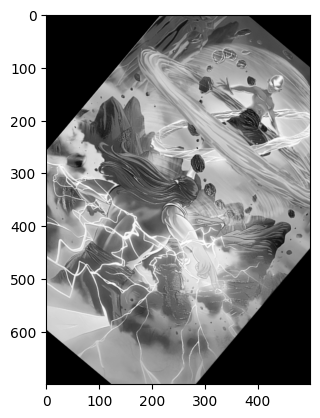

In [145]:
# Tampilkan hasil Rotasi 
plt.imshow(rotated_image, cmap="gray")
plt.show()

### Melakukan Translasi X= -163 dan Y = 300

In [147]:
# Definisikan matriks translasi
trans_x = -163  # Translasi horizontal
trans_y = 300   # Translasi vertikal
translation_matrix = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
# Lakukan translasi
translated_rotated_image = cv.warpAffine(rotated_image, translation_matrix, (cols, rows))

- Mendefinisikan offset translasi horizontal (trans_x) sebesar -163 piksel dan translasi vertikal (trans_y) sebesar 300 piksel.
- Membuat matriks translasi menggunakan np.float32, yang merupakan matriks 2x3 dengan baris pertama untuk translasi horizontal dan baris kedua untuk translasi vertikal. Nilai trans_x dan trans_y digunakan di dalam matriks translasi.
- Melakukan translasi pada gambar yang telah dirotasi menggunakan cv.warpAffine. Dimensi gambar output tetap sama dengan dimensi gambar asli.
  
Setelah translasi selesai, gambar hasil translasi disimpan dalam variabel translated_rotated_image.

#### Tampilan Hasil Translasi 


Kode tersebut menggunakan imshow dari Matplotlib untuk menampilkan gambar hasil translasi. Parameter cmap="gray" memastikan bahwa gambar ditampilkan dengan skala abu-abu.

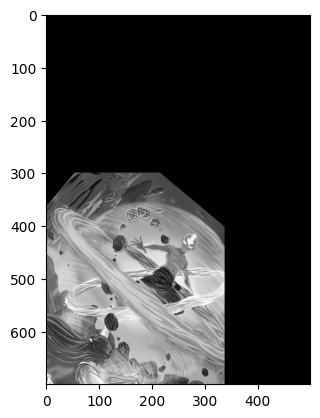

In [148]:
plt.imshow(translated_rotated_image, cmap="gray")

### Pencerminan Terhadap Sumbu Y

In [175]:
# Lakukan pencerminan sepanjang sumbu Y
mirrored_image = cv.flip(translated_rotated_image, 1)


Kode di atas melakukan pencerminan gambar sepanjang sumbu Y menggunakan fungsi cv.flip dari OpenCV. Argumen pertamanya adalah gambar yang akan diproses, dan argumen kedua adalah nilai yang menentukan sumbu pencerminan. Dalam hal ini, nilai 1 menunjukkan pencerminan sepanjang sumbu Y.

Setelah pencerminan selesai, gambar hasil pencerminan disimpan dalam variabel mirrored_image.

#### Tampilan Hasil Pencerminan


Kode tersebut menggunakan imshow dari Matplotlib untuk menampilkan gambar hasil pencerminan. Parameter cmap="gray" memastikan bahwa gambar ditampilkan dengan skala abu-abu.

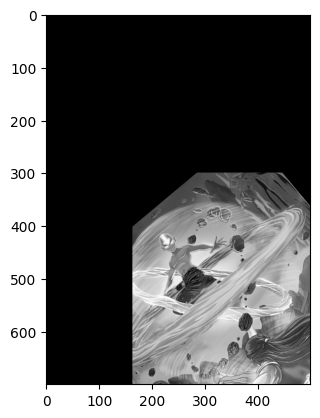

In [150]:
plt.imshow(mirrored_image, cmap="gray")

### Dilatasi Skala = 3

In [151]:
# Definisikan faktor skala
scale_factor = 3

# Lakukan dilatasi
dilated_image = cv.resize(mirrored_image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)


Kode di atas melakukan dilatasi pada gambar yang telah dipermirrored. Langkah-langkahnya adalah sebagai berikut:
- Mendefinisikan faktor skala (scale_factor) sebesar 3.
- Melakukan dilatasi pada gambar yang telah dipermirrored menggunakan fungsi cv.resize dari OpenCV. Parameter pertama adalah gambar yang akan diubah ukurannya. Parameter kedua (None) adalah ukuran gambar output yang tidak ditentukan secara eksplisit, karena ukurannya akan dihitung secara otomatis berdasarkan faktor skala. Parameter fx dan fy adalah faktor skala dalam arah horizontal dan vertikal. Interpolasi yang digunakan di sini adalah cv.INTER_NEAREST, yang merupakan metode interpolasi terdekat yang sederhana.
  
Setelah dilatasi selesai, gambar hasil dilatasi disimpan dalam variabel dilated_image.


Kode tersebut menggunakan imshow dari Matplotlib untuk menampilkan gambar hasil dilatasi. Parameter cmap="gray" memastikan bahwa gambar ditampilkan dengan skala abu-abu.

#### Tampilan Hasil Dilatasi 

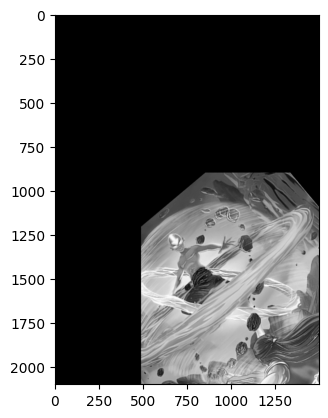

In [152]:
# Tampilkan hasil
plt.imshow(dilated_image, cmap="gray")